---
title: "Intro to R and R Markdown"
output:
  html_document:
    df_print: paged
---



```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = FALSE)
```



This is an intro to R and RMarkdown. We will discuss the basic functionality of the R language, as well as a few key packages.

"R is a language and environment for statistical computing and graphics."

The usefull of R is most notable for statistical work such as regression (linear, nonlinear etc) as well as graphing results.

The benefits of R in its open source nature. This basically means the original code from which R is built, is publically available and can be edited and made available to everyone (with limitations)

This proves to be very convenient with the plethora of packages availalbe in R, which allow complex methods to be quickly done using pre-defined functions. For example, there are multiple packages that facillitate regression, and the documentation to use these packages is easily accessed from https://cran.r-project.org/ (Comprehensive R archive network)

You can download R from the link below, if you haven't done so already:
https://cloud.r-project.org


RStudio is a convenient development environment for R, where you can create documents that combine R code with annotation.

You can download Rstudio from the link below if you haven't done so already. Note it is necesarry to download R before you can download RStudio

http://www.rstudio.com/download


Now to create a code block in RStudio, we use 


```{r} 
(tilde key) to create a box as shown below:

```{r}

In [2]:
print('Hello World') 

[1] "Hello World"


```

The beauty of R (and Python) comes from the ease of loading packages  
```{r include=FALSE}


In [3]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("readr")
# install.packages("Ecdat")

# if (!require(Ecdat)) install.packages("Ecdat")


In [5]:
library(ggplot2)
library(dplyr)
library(readr)
library(Ecdat)


```
Next we load data. Most data files will be in the csv format. We can use readr to load these from a local directory:
```{r}


In [6]:
Five_factor_data <- read_csv("F-F_Research_Data_5_Factors_2x3.csv", col_types = cols(Date = col_date(format = "%Y%m")), skip = 3)
str(Five_factor_data)
glimpse(Five_factor_data)



Warning message:
“Missing column names filled in: 'X1' [1]”Warning message:
“The following named parsers don't match the column names: Date”

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	14223 obs. of  7 variables:
 $ X1    : num  19630701 19630702 19630703 19630705 19630708 ...
 $ Mkt-RF: num  -0.67 0.79 0.63 0.4 -0.63 0.45 -0.18 -0.16 -0.12 -0.62 ...
 $ SMB   : num  0 -0.27 -0.17 0.08 0.04 0 0.21 0.14 0.02 0.07 ...
 $ HML   : num  -0.32 0.27 -0.09 -0.28 -0.18 0.1 0.01 -0.3 -0.11 -0.03 ...
 $ RMW   : num  -0.01 -0.07 0.17 0.08 -0.29 0.14 0.06 -0.06 0.12 0.17 ...
 $ CMA   : num  0.15 -0.19 -0.33 -0.33 0.13 -0.04 -0.07 0.05 0.04 -0.06 ...
 $ RF    : num  0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   `Mkt-RF` = col_double(),
  ..   SMB = col_double(),
  ..   HML = col_double(),
  ..   RMW = col_double(),
  ..   CMA = col_double(),
  ..   RF = col_double()
  .. )
Observations: 14,223
Variables: 7
$ X1       <dbl> 19630701, 19630702, 19630703, 19630705, 19630708, 19630709, …
$ `Mkt-RF` <dbl> -0.67, 0.79, 0.63, 0.40, -0.63, 0.45, -0.18, 

```
Now we will use a dataset from the Ecdat package
```{r}


In [7]:
glimpse(Housing)

Housing <-Housing

Housing %>%
  select_if(is.numeric)%>%
  summarise_all(funs(mean(.,na.rm = TRUE)))

Means_Housing <- Housing %>%
  select_if(is.numeric)%>%
  summarise_all(funs(mean(.,na.rm = TRUE),median(.,na.rm=TRUE)))

Housing %>%
  summarise_at(vars(lotsize, bedrooms),funs(Means = mean(.,na.rm = TRUE), StDev = sd(., na.rm = TRUE)))

Housing$price %>%summary()




Observations: 546
Variables: 12
$ price    <dbl> 42000, 38500, 49500, 60500, 61000, 66000, 66000, 69000, 8380…
$ lotsize  <dbl> 5850, 4000, 3060, 6650, 6360, 4160, 3880, 4160, 4800, 5500, …
$ bedrooms <dbl> 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 4, 1, 2, …
$ bathrms  <dbl> 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, …
$ stories  <dbl> 2, 1, 1, 2, 1, 1, 2, 3, 1, 4, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, …
$ driveway <fct> yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, no, y…
$ recroom  <fct> no, no, no, yes, no, yes, no, no, yes, yes, no, no, no, no, …
$ fullbase <fct> yes, no, no, no, no, yes, yes, no, yes, no, yes, no, no, no,…
$ gashw    <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, …
$ airco    <fct> no, no, no, no, no, yes, no, no, no, yes, yes, no, no, no, n…
$ garagepl <dbl> 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, …
$ prefarea <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no, …


Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

price,lotsize,bedrooms,bathrms,stories,garagepl
68121.6,5150.266,2.965201,1.285714,1.807692,0.6923077


lotsize_Means,bedrooms_Means,lotsize_StDev,bedrooms_StDev
5150.266,2.965201,2168.159,0.7373879


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25000   49125   62000   68122   82000  190000 

```
You may also want to compute means by group, to compare between groups. For that we can use the pipe syntax again and group the data first 
```{r}


In [8]:
Housing %>%
  group_by(driveway)%>%
  summarise_at(vars(price),funs(Mean = mean(.,na.rm=TRUE)))


driveway,Mean
no,48555.78
yes,71333.90


```
Now we will introduce plotting using ggplot in R. AS we aim to perform linear regression of Price on lotsize, let us look at an explanatory scatter plot of the 2 variables.
```{r}


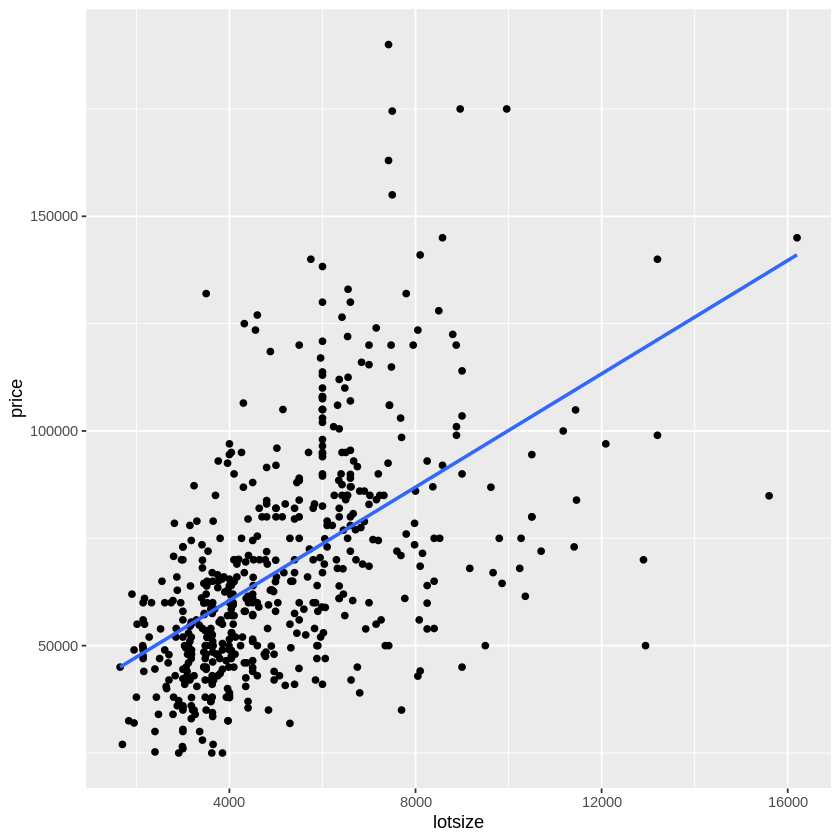

In [9]:
# Scatter Plot of price (y) against bedrooms (x), including the linear regression line

ggplot(Housing, aes(x=lotsize, y=price)) + geom_point() +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) # Extend regression lines



### Multiple Regression - with two predictors lotsize and bedrooms


```
```{r}




Call:
lm(formula = price ~ bedrooms, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-67123 -17223  -3698  13417 108147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    28773       4414   6.519 1.62e-10 ***
bedrooms       13270       1445   9.186  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24870 on 544 degrees of freedom
Multiple R-squared:  0.1343,	Adjusted R-squared:  0.1327 
F-statistic: 84.38 on 1 and 544 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ lotsize + bedrooms, data = Housing)

Residuals:
   Min     1Q Median     3Q    Max 
-65665 -12498  -2075   8970  97205 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.613e+03  4.103e+03   1.368    0.172    
lotsize     6.053e+00  4.243e-01  14.265  < 2e-16 ***
bedrooms    1.057e+04  1.248e+03   8.470 2.31e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21230 on 543 degrees of freedom
Multiple R-squared:  0.3703,	Adjusted R-squared:  0.3679 
F-statistic: 159.6 on 2 and 543 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lotsize,1,111558922960,111558922960,247.53887,3.138680e-46
bedrooms,1,32328775652,32328775652,71.73454,2.314456e-16
Residuals,543,244715087229,450672352,NA,NA


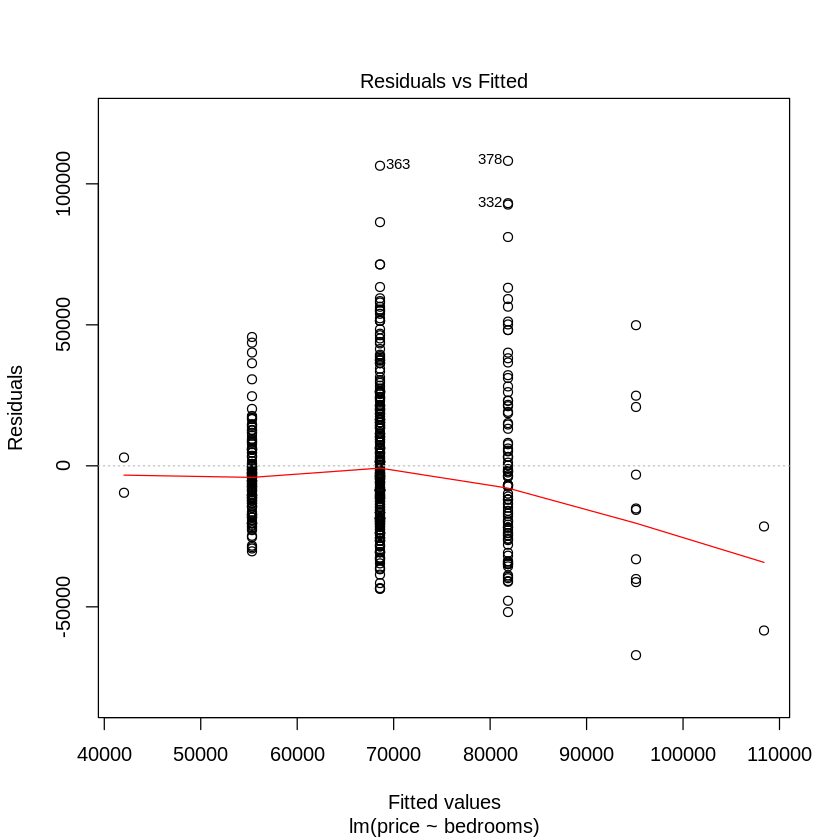

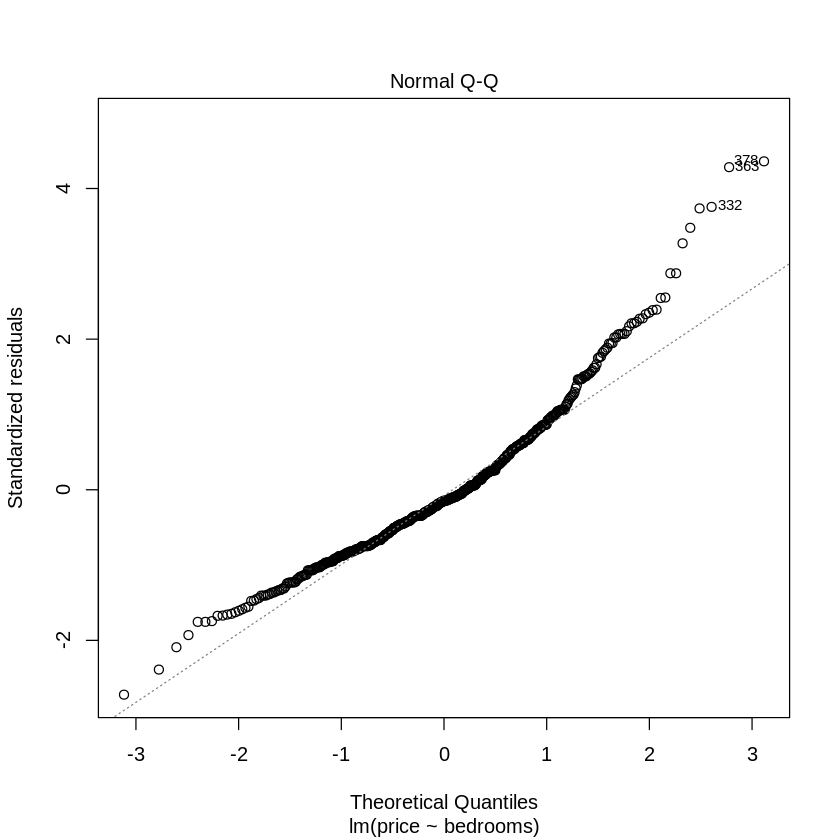

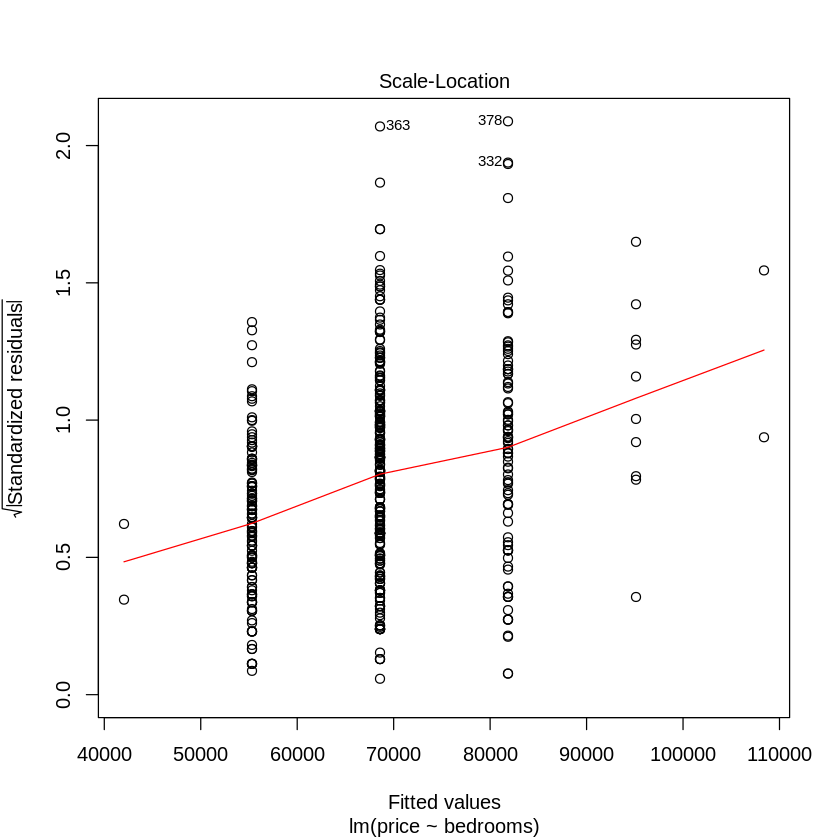

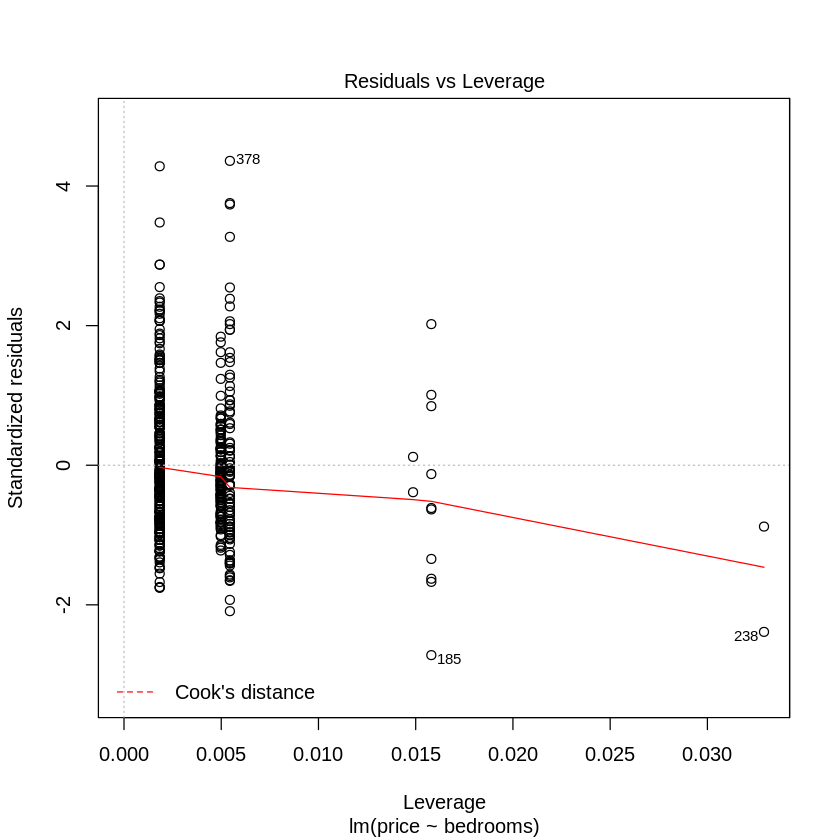

In [10]:
b.lm <- lm(formula = price ~ bedrooms, data = Housing)

ab.lm <- lm(formula = price ~ lotsize + bedrooms, data = Housing)

summary(b.lm)
summary(ab.lm) 

anova(ab.lm)   

plot(b.lm)
